<a href="https://colab.research.google.com/github/tlinhnguyen2308/CNN/blob/main/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ppduyn/nhandienkhuonmat")

print("Path to dataset files:", path)

100%|██████████| 63.3M/63.3M [00:03<00:00, 16.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ppduyn/nhandienkhuonmat/versions/1


In [12]:
import kagglehub
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
print("Dataset path:", path)
print("Folders in dataset:", os.listdir(path))  # Print folder names

Dataset path: /kaggle/input/nhandienkhuonmat
Folders in dataset: ['AI']


In [35]:
face_path = os.path.join(path, "AI", "Nhận diện khuôn mặt")

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy class (tên người) trong thư mục Nhận diện khuôn mặt
label_names = sorted(os.listdir(face_path))
print("Các lớp phát hiện:", label_names)

# Tải ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(face_path, label_name)
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

# Chuyển sang mảng numpy
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình
model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Các lớp phát hiện: ['Kim Tuyền', 'Ngọc Lan', 'Phương Duyên', 'Thuý Vy', 'Thuỳ Linh']
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0833 - loss: 1.8659 - val_accuracy: 0.6667 - val_loss: 3.4817
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step - accuracy: 0.4583 - loss: 6.2574 - val_accuracy: 0.0000e+00 - val_loss: 4.5507
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2500 - loss: 4.0461 - val_accuracy: 0.3333 - val_loss: 3.8372
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2083 - loss: 4.8164 - val_accuracy: 0.6667 - val_loss: 0.6576
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5000 - loss: 2.7599 - val_accuracy: 0.6667 - val_loss: 1.0383
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.4583 - loss: 2.5730 - val_accuracy: 0.6667 - val_loss: 0.7636
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6250 - loss: 1.1328 - val_accuracy: 0.0000e+00 - val_loss: 1.6051
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


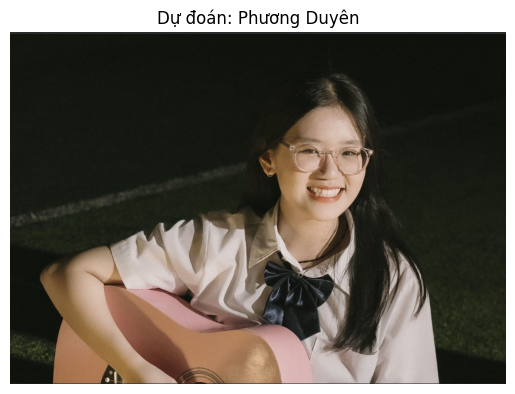

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3333 - loss: 1.3928
Độ chính xác: 0.3333333432674408


In [32]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/pduyn.png'  # đổi tên file ảnh ở đây
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá
loss, acc = model.evaluate(X_test, y_test)
print('Độ chính xác:', acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


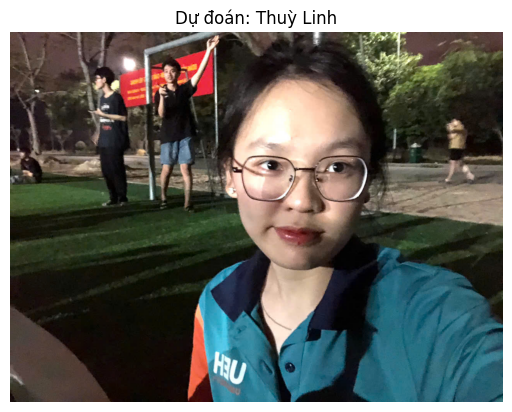

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8333 - loss: 0.4780
Độ chính xác: 0.8333333134651184


In [36]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

image_path = '/content/h1.jpg'  # đổi tên file ảnh ở đây
processed_image = preprocess_image(image_path)
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá
loss, acc = model.evaluate(X_test, y_test)
print('Độ chính xác:', acc)

In [50]:
emotion_path = os.path.join(path, "AI", "Cảm xúc")

# Cấu hình
image_size = 64
data = []
labels = []

# Tự động lấy tên các lớp cảm xúc
label_names = sorted(os.listdir(emotion_path))
print("Các lớp cảm xúc:", label_names)

# Tải ảnh và gán nhãn
for i, label_name in enumerate(label_names):
    folder = os.path.join(emotion_path, label_name)
    if not os.path.isdir(folder):
        continue

    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (image_size, image_size))
            img = img / 255.0
            data.append(img.flatten())
            labels.append(i)
        except:
            continue

# Chuyển sang mảng numpy
data = np.array(data)
labels = to_categorical(labels, num_classes=len(label_names))

# Chia dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Xây dựng mô hình ANN
model = Sequential([
    Dense(256, input_shape=(image_size * image_size * 3,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_names), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Các lớp cảm xúc: ['Buồn', 'Giận', 'Vui']
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3750 - loss: 1.1399 - val_accuracy: 0.2500 - val_loss: 14.3813
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.3750 - loss: 9.7096 - val_accuracy: 0.1250 - val_loss: 7.2925
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2812 - loss: 7.0264 - val_accuracy: 0.6250 - val_loss: 6.5630
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.3438 - loss: 10.8735 - val_accuracy: 0.6250 - val_loss: 3.0357
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.3438 - loss: 5.6456 - val_accuracy: 0.2500 - val_loss: 2.9478
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3750 - loss: 2.8453 - val_accuracy: 0.2500 - val_loss: 4.6096
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3750 - loss: 3.1476 - val_accuracy: 0.1250 - val_loss: 3.4687
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.6250 - loss: 1.485

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


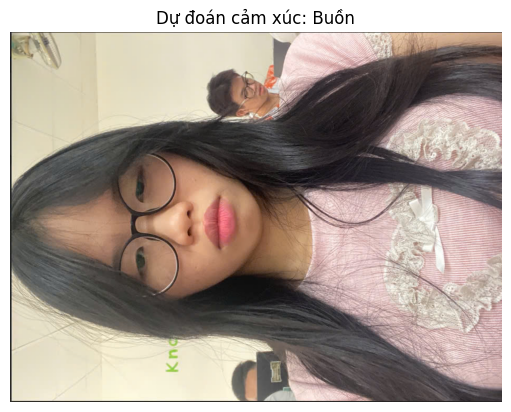

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.1250 - loss: 3.6071
Độ chính xác: 0.125


In [40]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

# Đường dẫn ảnh cảm xúc bên ngoài
image_path = '/content/dõi.jpg'
processed_image = preprocess_image(image_path)

predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán cảm xúc: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá độ chính xác
loss, acc = model.evaluate(X_test, y_test)
print('Độ chính xác:', acc)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


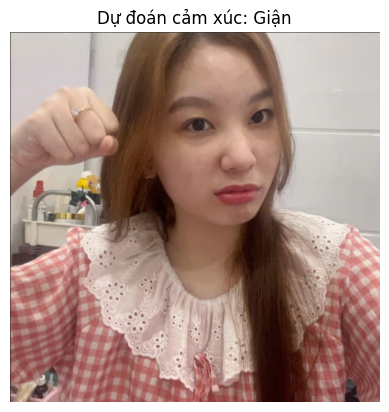

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6250 - loss: 1.3803
Độ chính xác: 0.625


In [51]:
def preprocess_image(image_path, image_size=64):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (image_size, image_size))
    img = img / 255.0
    img = img.flatten()
    return np.expand_dims(img, axis=0)

# Đường dẫn ảnh cảm xúc bên ngoài
image_path = '/content/minnnnn.jpg'
processed_image = preprocess_image(image_path)

predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions)

# Hiển thị ảnh và kết quả
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f'Dự đoán cảm xúc: {label_names[predicted_class]}')
plt.axis('off')
plt.show()

# Đánh giá độ chính xác
loss, acc = model.evaluate(X_test, y_test)
print('Độ chính xác:', acc)